In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset_link = r'Emoji Diet Nutritional Data (g) - EmojiFoods (g).csv'

In [3]:
df = pd.read_csv(dataset_link)
df.head()

,name,emoji,Calories (kcal),Carbohydrates (g),Total Sugar (g),Protein (g),Total Fat (g),Saturated Fat (g),Monounsaturated Fat (g),Polyunsaturated Fat (g),...,Calcium (g),Copper (mg),Iron (mg),Magnesium (mg),Manganese (mg),Phosphorus (g),Potassium (g),Selenium (ug),Sodium (g),Zinc (mg)
0,grapes,🍇,0.69,0.1810,0.1548,0.0072,0.0016,0.00054,0.00007,0.00048,...,0.10,0.00127,0.0036,0.07,0.00071,0.20,1.91,0.001,0.02,0.0007
1,melon,🍈,0.28,0.0658,0.0569,0.0111,0.0010,0.00025,0.00002,0.00039,...,0.11,0.00060,0.0034,0.11,0.00035,0.05,1.82,0.004,0.09,0.0007
2,watermelon,🍉,0.30,0.0755,0.0620,0.0061,0.0015,0.00016,0.00037,0.00050,...,0.07,0.00042,0.0024,0.10,0.00038,0.11,1.12,0.004,0.01,0.0010
3,tangerine,🍊,0.53,0.1334,0.1058,0.0081,0.0031,0.00039,0.00060,0.00065,...,0.37,0.00042,0.0015,0.12,0.00039,0.20,1.66,0.001,0.02,0.0007
4,lemon,🍋,0.29,0.0932,0.0250,0.0110,0.0030,0.00039,0.00011,0.00089,...,0.26,0.00037,0.0060,0.08,0.00030,0.16,1.38,0.004,0.02,0.0006


In [4]:
from sklearn.cluster import KMeans
import sklearn.preprocessing as sp

In [5]:
labels =[0,0,0,0,0,0,0,0,0,0,
         0,0,0,0,1,0,1,1,1,1,
         1,1,1,1,1,2,2,2,2,3,
         3,3,3,4,4,4,4,4,4,4,
         2,2,2,3,5,5,5,5,5,5,
         5,5,6,6,6,6,6,6]
len(labels)

df['labels']= labels
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 36 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   name                            58 non-null     object 
 1   emoji                           58 non-null     object 
 2   Calories (kcal)                 58 non-null     float64
 3   Carbohydrates (g)               58 non-null     float64
 4   Total Sugar (g)                 58 non-null     float64
 5   Protein (g)                     58 non-null     float64
 6   Total Fat (g)                   58 non-null     float64
 7   Saturated Fat (g)               58 non-null     float64
 8   Monounsaturated Fat (g)         58 non-null     float64
 9   Polyunsaturated Fat (g)         58 non-null     float64
 10  Total Fiber (g)                 58 non-null     float64
 11  Cholesterol (mg)                58 non-null     float64
 12  Vitamin B6 (mg)                 58 non

In [6]:
X = df.iloc[:, 2:11]
y = df['labels']

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Lasso
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC

In [10]:
rf = RandomForestClassifier()
lr = LogisticRegression()
lasso_regression = LogisticRegression(penalty='l2')
mlp = MLPClassifier()
standard_scaler = SVC()

In [11]:
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
rf_acc = accuracy_score(y_test, y_pred)
rf_acc

0.8333333333333334

In [12]:
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
lr_acc = accuracy_score(y_test, y_pred)
lr_acc

0.6666666666666666

In [13]:
lasso_regression.fit(X_train, y_train)
y_pred = lasso_regression.predict(X_test)
lasso_acc = accuracy_score(y_test, y_pred)
lasso_acc

0.6666666666666666

In [14]:
mlp.fit(X_train, y_train)
y_pred = mlp.predict(X_test)
mlp_acc = accuracy_score(y_test, y_pred)
mlp_acc

/home/dingo/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


0.75

In [15]:
standard_scaler.fit(X_train, y_train)
y_pred = standard_scaler.predict(X_test)
standard_scaler_acc = accuracy_score(y_test, y_pred)
standard_scaler_acc

0.6666666666666666

In [18]:
rf, logistic, lasso, standard, mlp = 83, 66, 66, 66, 75

/home/dingo/.local/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(0.0, 100.0)

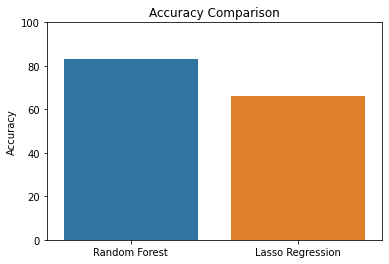

In [19]:
ax = sns.barplot(['Random Forest', 'Lasso Regression'], [rf, lasso])
ax.set_title('Accuracy Comparison')
ax.set_ylabel('Accuracy')
ax.set_ylim(0, 100)

/home/dingo/.local/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(0.0, 100.0)

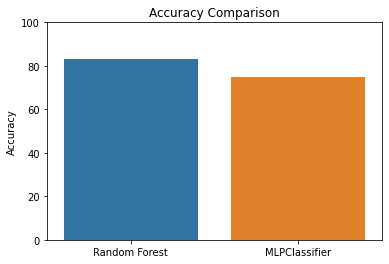

In [20]:
ax = sns.barplot(['Random Forest', 'MLPClassifier'], [rf, mlp])
ax.set_title('Accuracy Comparison')
ax.set_ylabel('Accuracy')
ax.set_ylim(0, 100)

/home/dingo/.local/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(0.0, 100.0)

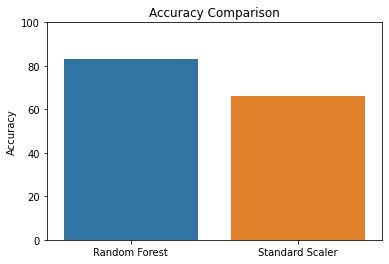

In [21]:
ax = sns.barplot(['Random Forest', 'Standard Scaler'], [rf, standard])
ax.set_title('Accuracy Comparison')
ax.set_ylabel('Accuracy')
ax.set_ylim(0, 100)

/home/dingo/.local/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(0.0, 100.0)

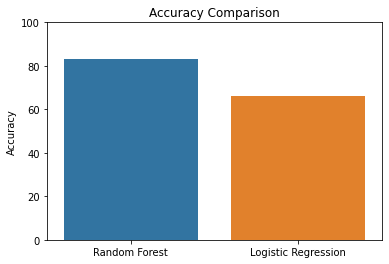

In [22]:
ax = sns.barplot(['Random Forest', 'Logistic Regression'], [rf, logistic])
ax.set_title('Accuracy Comparison')
ax.set_ylabel('Accuracy')
ax.set_ylim(0, 100)